# Analyze and Visualize sentiment patterns in social media data to understand public opinion and attitude towards specific topics or brands



# Importing the necessary libraries

In [30]:
import pandas as pd 
import numpy as np 
import seaborn as sb 
import matplotlib.pyplot as plt

In [31]:
from textblob import TextBlob

# Data loading

In [32]:
column_names = ['id', 'product', 'sentiment', 'text']
tweets=pd.read_csv('twitter_training.csv', names=column_names)

In [33]:
tweets.head()

,id,product,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [34]:
tweets.isnull().sum()

id             0
product        0
sentiment      0
text         686
dtype: int64

# Analysis and Visualization

# Sentiment Distribution:
* Visualizing the distribution of sentiment scores using a histogram or KDE plot. This will give us an overview of how positive, neutral, and negative sentiments are distributed.

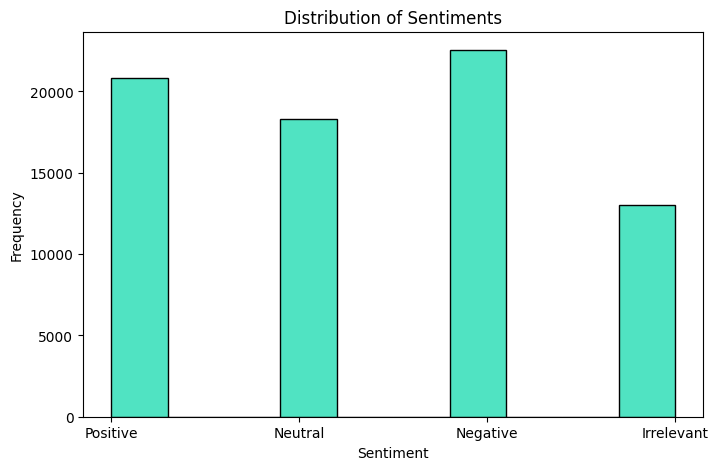

In [45]:
plt.figure(figsize=(8, 5))
plt.hist(tweets['sentiment'], color='#50E3C2', edgecolor='black')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiments')
plt.show()



# Sentiment Pie Chart:


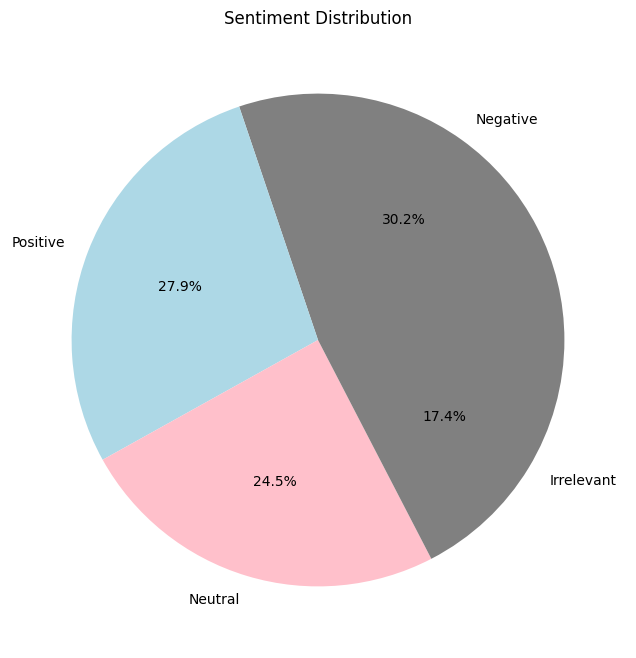

In [39]:
sentiment_counts = tweets['sentiment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['gray', 'lightblue', 'pink'])
plt.title('Sentiment Distribution')
plt.show()


# Average Sentiment Over Categories:


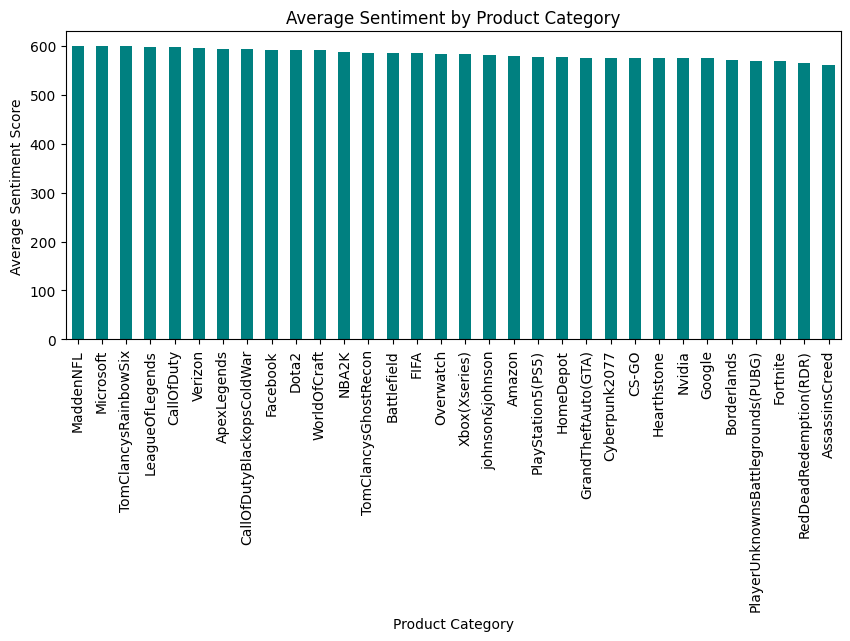

In [49]:

average_sentiment_by_category = tweets.groupby('product')['sentiment'].value_counts().unstack().mean(axis=1).sort_values(ascending=False)

plt.figure(figsize=(10, 4))
average_sentiment_by_category.plot(kind='bar', color='teal')
plt.xlabel('Product Category')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment by Product Category')
plt.show()


# Sentiment Over Time

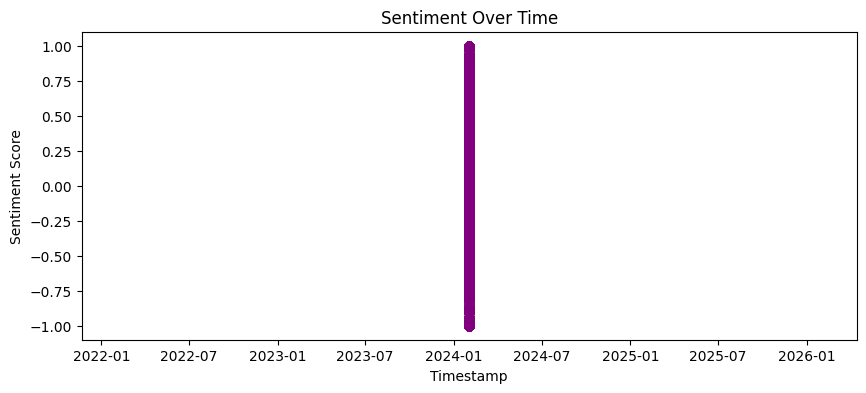

In [24]:
tweets['timestamp'] = pd.to_datetime('now')
tweets['sentiment'] = tweets['text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Time series plot
plt.figure(figsize=(10, 4))
plt.plot(tweets['timestamp'], tweets['sentiment'], marker='o', linestyle='-', color='purple')
plt.title('Sentiment Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Sentiment Score')
plt.show()

# WORDCLOUD

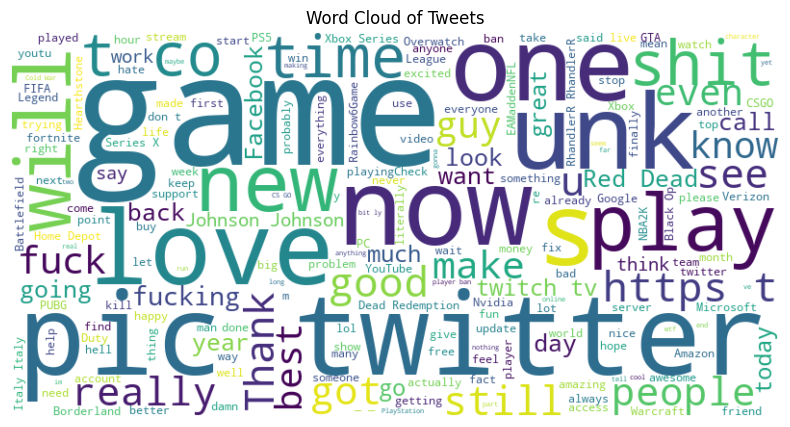

In [27]:
from wordcloud import WordCloud

text_data = ' '.join(tweets['text'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweets')
plt.show()
